# Competition_Group17



Brief Description of the Dataset: 
--------------------------------- 
    Each of the 19 activities is performed by eight subjects (4 female, 4 male, between the ages 20 and 30) for 5 minutes. 
    Total signal duration is 5 minutes for each activity of each subject. 
    The subjects are asked to perform the activities in their own style and were not restricted on how the activities should be performed. For this reason, there are inter-subject variations in the speeds and amplitudes of some activities. 
    The activities are performed at the Bilkent University Sports Hall, in the Electrical and Electronics Engineering Building, 
    and in a flat outdoor area on campus. Sensor units are calibrated to acquire data at 25 Hz sampling frequency. The 5-min signals are divided into 5-sec segments so that 480(=60x8) signal segments are obtained for each activity. 

    The 19 activities are: 
        sitting (A1), 
        standing (A2), 
        lying on back and on right side (A3 and A4), 
        ascending and descending stairs (A5 and A6), 
        standing in an elevator still (A7) 
        and moving around in an elevator (A8), 
        walking in a parking lot (A9), 
        walking on a treadmill with a speed of 4 km/h (in flat and 15 deg inclined positions) (A1 
        0 and A11), 
        running on a treadmill with a speed of 8 km/h (A12), 
        exercising on a stepper (A13), 
        exercising on a cross trainer (A14), 
        cycling on an exercise bike in horizontal and vertical positions (A15 and A16), 
        rowing (A17), 
        jumping (A18), 
        and playing basketball (A19). 

    File structure: 

        19 activities (a) (in the order given above) 
        8 subjects (p) 
        60 segments (s) 
        5 units on torso (T), right arm (RA), left arm (LA), right leg (RL), left leg (LL) 
        9 sensors on each unit (x,y,z accelerometers, x,y,z gyroscopes, x,y,z magnetometers) 

    Folders a01, a02, ..., a19 contain data recorded from the 19 activities. 

    For each activity, the subfolders p1, p2, ..., p8 contain data from each of the 8 subjects. 

    In each subfolder, there are 60 text files s01, s02, ..., s60, one for each segment. 

    In each text file, there are 5 units x 9 sensors = 45 columns and 5 sec x 25 Hz = 125 rows. 
    Each column contains the 125 samples of data acquired from one of the sensors of one of the units over a period of 5 sec. 
    Each row contains data acquired from all of the 45 sensor axes at a particular sampling instant separated by commas. 

    Columns 1-45 correspond to: 
    T_xacc, T_yacc, T_zacc, T_xgyro, ..., T_ymag, T_zmag, 
    RA_xacc, RA_yacc, RA_zacc, RA_xgyro, ..., RA_ymag, RA_zmag, 
    LA_xacc, LA_yacc, LA_zacc, LA_xgyro, ..., LA_ymag, LA_zmag, 
    RL_xacc, RL_yacc, RL_zacc, RL_xgyro, ..., RL_ymag, RL_zmag, 
    LL_xacc, LL_yacc, LL_zacc, LL_xgyro, ..., LL_ymag, LL_zmag. 

    Therefore, 
    columns 1-9 correspond to the sensors in unit 1 (T), 
    columns 10-18 correspond to the sensors in unit 2 (RA), 
    columns 19-27 correspond to the sensors in unit 3 (LA), 
    columns 28-36 correspond to the sensors in unit 4 (RL), 
    columns 37-45 correspond to the sensors in unit 5 (LL). 

    * accelerometers - an instrument for measuring the acceleration of a moving or vibrating body.
    * gyroscope      - a device consisting of a wheel or disc mounted so that it can spin rapidly about an axis which is itself free to alter in direction. The orientation of the axis is not affected by tilting of the mounting, so gyroscopes can be used to provide stability or maintain a reference direction in navigation systems, automatic pilots, and stabilizers
    * magnetometer   - an instrument used for measuring magnetic forces, especially the earth's magnetism

### Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

## Data collection and data import

In [96]:
import glob

clist = ['T_xacc', 'T_yacc', 'T_zacc', 'T_xgyro', 'T_ygyro', 'T_zgyro','T_xmag', 'T_ymag', 'T_zmag', 
         'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro','RA_xmag', 'RA_ymag', 'RA_zmag', 
         'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro','LA_xmag', 'LA_ymag', 'LA_zmag', 
         'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro','RL_xmag', 'RL_ymag', 'RL_zmag', 
         'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro','LL_xmag', 'LL_ymag', 'LL_zmag']


li = []
activity =['sitting','standing','lying on back side','lying on right side','Ascending stairs','Decending stairs','standing in an elevator','moving around in an elevator',
           'walking in a parking lot','walking (4 km/h) in flat',
           'walking (4 km/h) in 15 deg inclined','running (8 km/hr)',
           'exercising on a stepper','exercising on a cross trainer','cycling in horizontal position',
           'cycling in vertical position','rowing','jumping','playing basketball']
for a in range(1,20):
    path = r'C:\Users\deepthi777\Downloads\data (1)\data\a'+str(a).rjust(2,'0')
    print(path)
    for i in range(1,9):
        path = path+'/p'+str(i) 
        all_files = glob.glob(path + "/s0*.txt")

        for filename in all_files:
            #print(filename)
            df = pd.read_csv(filename, index_col=None, header=None)
            df.columns=clist
            df['Activity'] = activity[a-1]
            li.append(df)

data = pd.concat(li, axis=0, ignore_index=True)


C:\Users\deepthi777\Downloads\data (1)\data\a01
C:\Users\deepthi777\Downloads\data (1)\data\a02
C:\Users\deepthi777\Downloads\data (1)\data\a03
C:\Users\deepthi777\Downloads\data (1)\data\a04
C:\Users\deepthi777\Downloads\data (1)\data\a05
C:\Users\deepthi777\Downloads\data (1)\data\a06
C:\Users\deepthi777\Downloads\data (1)\data\a07
C:\Users\deepthi777\Downloads\data (1)\data\a08
C:\Users\deepthi777\Downloads\data (1)\data\a09
C:\Users\deepthi777\Downloads\data (1)\data\a10
C:\Users\deepthi777\Downloads\data (1)\data\a11
C:\Users\deepthi777\Downloads\data (1)\data\a12
C:\Users\deepthi777\Downloads\data (1)\data\a13
C:\Users\deepthi777\Downloads\data (1)\data\a14
C:\Users\deepthi777\Downloads\data (1)\data\a15
C:\Users\deepthi777\Downloads\data (1)\data\a16
C:\Users\deepthi777\Downloads\data (1)\data\a17
C:\Users\deepthi777\Downloads\data (1)\data\a18
C:\Users\deepthi777\Downloads\data (1)\data\a19


In [97]:
data.tail()

,T_xacc,T_yacc,T_zacc,T_xgyro,T_ygyro,T_zgyro,T_xmag,T_ymag,T_zmag,RA_xacc,...,LL_xacc,LL_yacc,LL_zacc,LL_xgyro,LL_ygyro,LL_zgyro,LL_xmag,LL_ymag,LL_zmag,Activity
21370,7.2237,-1.7550,6.3435,-0.13300,0.359230,0.71494,-0.39166,0.035427,-0.94091,-9.6012,...,-8.3485,-4.1443,1.86420,-0.43007,-0.180720,0.48746,0.82566,0.79040,-0.080289,playing basketball
21371,6.8277,-1.8860,6.5117,-0.23723,0.665850,0.66508,-0.37137,0.053579,-0.95003,-8.1706,...,-10.3290,-5.1449,0.13970,-0.26487,-0.006831,-0.18924,0.83115,0.78208,-0.079038,playing basketball
21372,6.3880,-1.7795,6.7030,-0.55523,0.141610,0.71520,-0.35225,0.071135,-0.95510,-5.8555,...,-8.4945,-1.3614,0.88312,-1.23790,0.069515,0.15730,0.82959,0.78627,-0.048975,playing basketball
21373,6.7203,-2.3460,6.9182,-0.63154,-0.213110,0.54337,-0.35365,0.102170,-0.95048,-4.9128,...,-9.5142,-1.9766,0.86423,-1.19470,0.176960,0.39447,0.83933,0.77656,-0.000497,playing basketball
21374,6.6978,-2.4342,6.7981,-0.39625,0.013101,0.42051,-0.35598,0.128370,-0.94625,-4.2295,...,-9.8158,-3.1104,0.81126,-0.79802,0.012641,0.52101,0.85377,0.75879,0.031140,playing basketball


In [98]:
data.shape

(21375, 46)

In [99]:
data.describe()

,T_xacc,T_yacc,T_zacc,T_xgyro,T_ygyro,T_zgyro,T_xmag,T_ymag,T_zmag,RA_xacc,...,RL_zmag,LL_xacc,LL_yacc,LL_zacc,LL_xgyro,LL_ygyro,LL_zgyro,LL_xmag,LL_ymag,LL_zmag
count,21375.000000,21375.000000,21375.000000,21375.000000,21375.000000,21375.000000,21375.000000,21375.000000,21375.000000,21375.000000,...,21375.000000,21375.000000,21375.000000,21375.000000,21375.000000,21375.000000,21375.000000,21375.000000,21375.000000,21375.000000
mean,7.679890,-0.166386,3.829459,-0.002925,0.015293,-0.001185,-0.558316,0.002987,-0.432843,2.997455,...,0.002566,-7.364846,-3.281515,0.349713,-0.023332,0.020575,-0.009382,0.426682,0.382825,-0.026775
std,5.074295,2.236763,2.594654,0.653218,0.795763,0.259519,0.287589,0.311784,0.332283,4.878977,...,0.316136,5.731115,6.101856,2.813584,0.780740,0.416585,1.175867,0.294556,0.285294,0.321942
min,-16.400000,-13.421000,-10.050000,-9.310300,-13.138000,-2.397700,-1.010900,-0.675680,-1.013900,-28.551000,...,-0.798980,-69.560000,-70.080000,-23.182000,-5.430700,-4.623400,-4.228000,-0.626080,-0.571560,-0.649780
25%,7.004800,-0.578005,2.398550,-0.151730,-0.118035,-0.081462,-0.780355,-0.214650,-0.719775,-0.608525,...,-0.244045,-9.913450,-8.291050,-0.879235,-0.316070,-0.090951,-0.431725,0.275950,0.210850,-0.347035
50%,8.428400,0.153440,3.726900,0.000000,0.014824,-0.001977,-0.624550,-0.070285,-0.515340,3.259800,...,0.000000,-8.860600,-2.484900,-0.062472,-0.002865,0.001509,-0.000506,0.459240,0.403690,-0.006321
75%,9.373050,1.122650,5.268650,0.157275,0.173355,0.080586,-0.448615,0.287780,-0.121235,7.319650,...,0.277600,-2.795700,0.157610,1.047450,0.206130,0.124030,0.557385,0.631880,0.569050,0.154890
max,51.189000,15.401000,24.103000,7.229700,11.088000,4.489300,0.734490,0.651580,0.785120,66.550000,...,0.575180,9.091100,53.635000,19.997000,7.485100,5.575200,5.794600,1.111900,1.022100,0.721510


In [100]:
data['Activity']. value_counts()

Decending stairs                       1125
running (8 km/hr)                      1125
jumping                                1125
moving around in an elevator           1125
exercising on a cross trainer          1125
cycling in horizontal position         1125
playing basketball                     1125
walking (4 km/h) in 15 deg inclined    1125
exercising on a stepper                1125
walking in a parking lot               1125
rowing                                 1125
walking (4 km/h) in flat               1125
standing                               1125
lying on right side                    1125
Ascending stairs                       1125
standing in an elevator                1125
cycling in vertical position           1125
lying on back side                     1125
sitting                                1125
Name: Activity, dtype: int64

In [101]:
data.isnull().sum()

T_xacc      0
T_yacc      0
T_zacc      0
T_xgyro     0
T_ygyro     0
T_zgyro     0
T_xmag      0
T_ymag      0
T_zmag      0
RA_xacc     0
RA_yacc     0
RA_zacc     0
RA_xgyro    0
RA_ygyro    0
RA_zgyro    0
RA_xmag     0
RA_ymag     0
RA_zmag     0
LA_xacc     0
LA_yacc     0
LA_zacc     0
LA_xgyro    0
LA_ygyro    0
LA_zgyro    0
LA_xmag     0
LA_ymag     0
LA_zmag     0
RL_xacc     0
RL_yacc     0
RL_zacc     0
RL_xgyro    0
RL_ygyro    0
RL_zgyro    0
RL_xmag     0
RL_ymag     0
RL_zmag     0
LL_xacc     0
LL_yacc     0
LL_zacc     0
LL_xgyro    0
LL_ygyro    0
LL_zgyro    0
LL_xmag     0
LL_ymag     0
LL_zmag     0
Activity    0
dtype: int64

## Insights :

#### We have imported the dataset and have reduced the sample count. Now, the dataset have 21375 rows and 46 columns. There are no null values present in the given dataset.

## Data preprocessing

## Feature reduction based on Correlation

In [102]:
corrMartix = data[['RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro','RL_xmag', 'RL_ymag', 'RL_zmag', 
      'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro','LL_xmag', 'LL_ymag', 'LL_zmag']].corr()

<AxesSubplot:>

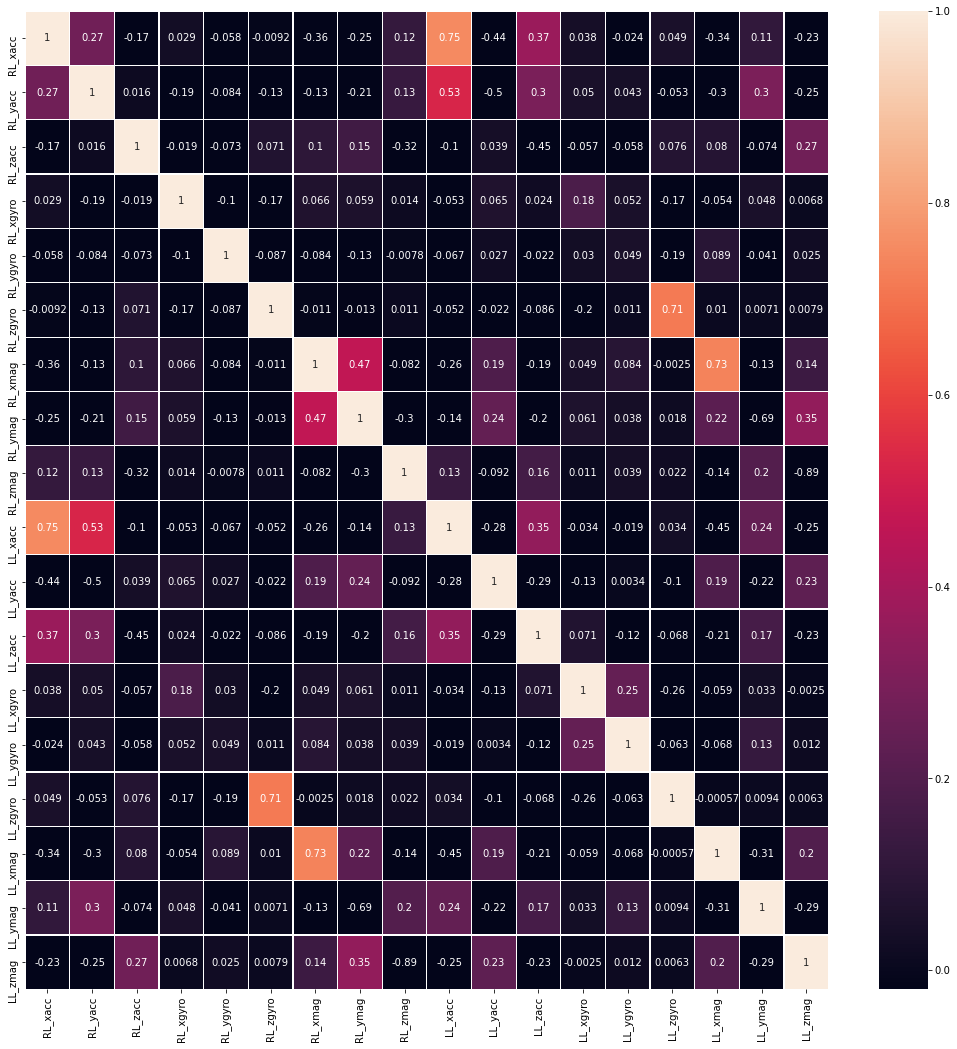

In [103]:
plt.subplots(figsize=(18, 18))
sns.heatmap(corrMartix,vmin=-.02,vmax=1,annot=True,linewidth=0.2)

In [104]:
data.drop(['LL_xacc', 'LL_xmag'], axis=1, inplace=True)

In [105]:
data.shape

(21375, 44)

#### We have dropped 'LL_xacc' and 'LL_xmag' as they are showing strong positive correlation with 'RL_xacc' and 'RL_xmag' respectively, as part of feature reduction.

### Outlier detection and handling

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43]),
 [Text(1, 0, 'T_xacc'),
  Text(2, 0, 'T_yacc'),
  Text(3, 0, 'T_zacc'),
  Text(4, 0, 'T_xgyro'),
  Text(5, 0, 'T_ygyro'),
  Text(6, 0, 'T_zgyro'),
  Text(7, 0, 'T_xmag'),
  Text(8, 0, 'T_ymag'),
  Text(9, 0, 'T_zmag'),
  Text(10, 0, 'RA_xacc'),
  Text(11, 0, 'RA_yacc'),
  Text(12, 0, 'RA_zacc'),
  Text(13, 0, 'RA_xgyro'),
  Text(14, 0, 'RA_ygyro'),
  Text(15, 0, 'RA_zgyro'),
  Text(16, 0, 'RA_xmag'),
  Text(17, 0, 'RA_ymag'),
  Text(18, 0, 'RA_zmag'),
  Text(19, 0, 'LA_xacc'),
  Text(20, 0, 'LA_yacc'),
  Text(21, 0, 'LA_zacc'),
  Text(22, 0, 'LA_xgyro'),
  Text(23, 0, 'LA_ygyro'),
  Text(24, 0, 'LA_zgyro'),
  Text(25, 0, 'LA_xmag'),
  Text(26, 0, 'LA_ymag'),
  Text(27, 0, 'LA_zmag'),
  Text(28, 0, 'RL_xacc'),
  Text(29, 0, 'RL_yacc'),
  Text(30, 0, 'RL_zacc'),
  Text(31, 0, 'RL_xgyro'),
  Te

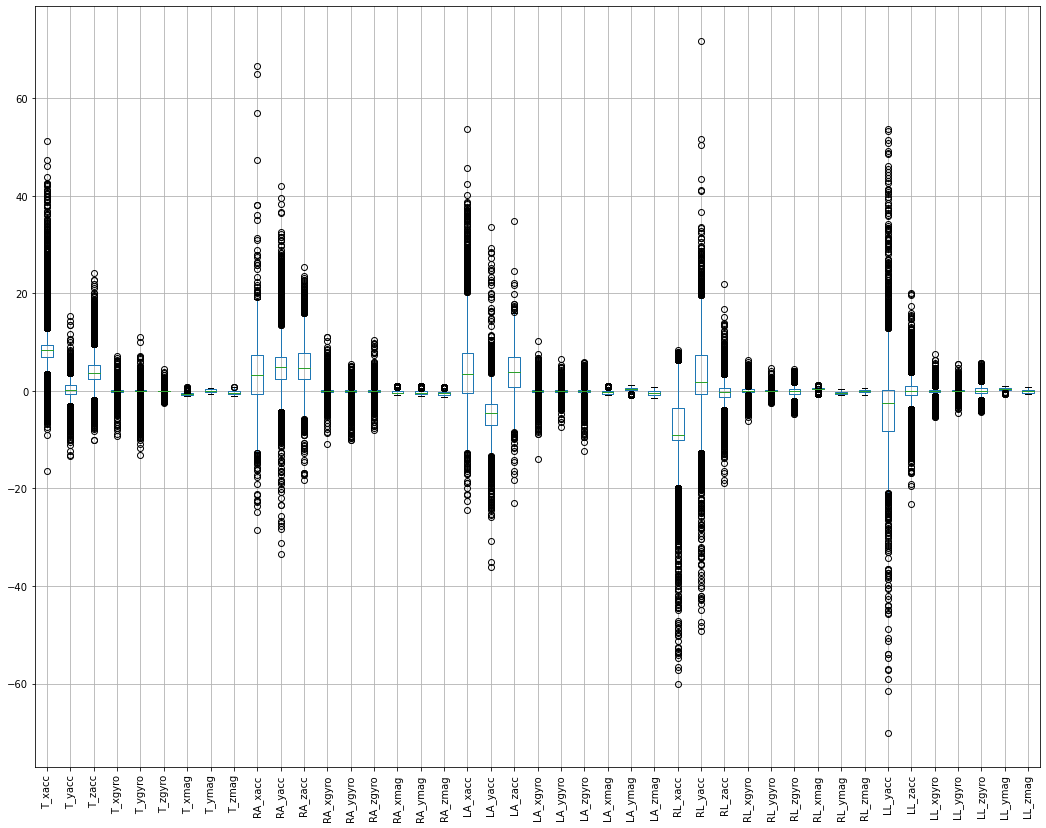

In [106]:
plt.figure(figsize=(18, 14))
data.boxplot()
plt.xticks(rotation=90) 

#### column - T_xacc

Text(0.5, 1.0, 'Box plot of T_xacc')

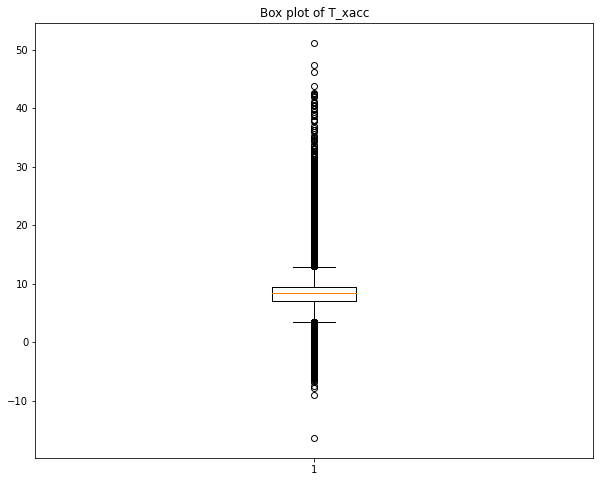

In [107]:
plt.figure(figsize=(10, 8))
plt.boxplot(data['T_xacc'])
plt.title('Box plot of T_xacc')

#### Finding the percentiles and Inter Quartile Range (IQR)

In [108]:
Q1 = np.percentile(data['T_xacc'],25,interpolation='midpoint')
Q2 = np.percentile(data['T_xacc'],50,interpolation='midpoint')
Q3 = np.percentile(data['T_xacc'],75,interpolation='midpoint')
print('Q1-',Q1)
print('Q2-',Q2)
print('Q3-',Q3)
#find the interquartile range IQR
IQR = Q3 - Q1
print('IQR-',IQR)
low_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
print('low_limit-',low_limit)
print('upper_limit-',upper_limit)
# Finding the outliners based on the upper an lower limit
out = pd.DataFrame()
out['outlier'] = data[(data['T_xacc']<low_limit) | (data['T_xacc']>upper_limit)]['T_xacc']


Q1- 7.0047999999999995
Q2- 8.4284
Q3- 9.37305
IQR- 2.3682499999999997
low_limit- 3.452425
upper_limit- 12.925424999999999


In [109]:
out

,outlier
2250,-4.8676
2251,-4.8527
2252,-4.8228
2253,-4.8381
2254,-4.8229
...,...
21257,18.1500
21267,15.9510
21268,18.9640
21342,14.3890


In [110]:
# Removing the ouliers
ind1= (data['T_xacc']<low_limit) | (data['T_xacc']>upper_limit)
#ind = data.loc((data['Fare']<low_limit) | (data['Fare']>upper_limit)).index

data.drop(data.loc[ind1].index,inplace=True)

In [111]:
data.shape

(16557, 44)

Text(0.5, 1.0, 'Box plot of T_xacc')

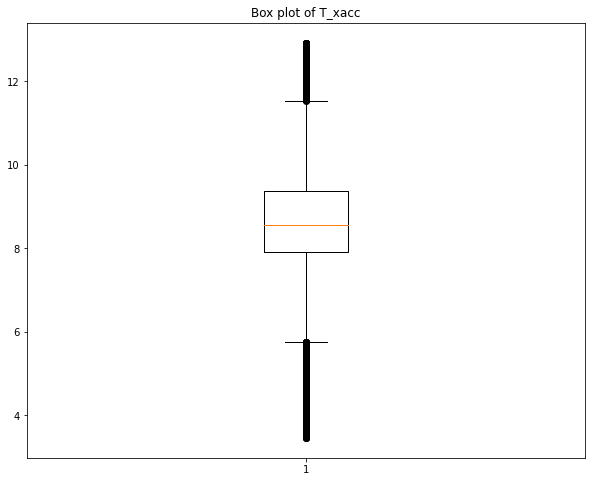

In [112]:
plt.figure(figsize=(10, 8))
plt.boxplot(data['T_xacc'])
plt.title('Box plot of T_xacc')

#### column - RL_xacc

Text(0.5, 1.0, 'Box plot of RL_xacc')

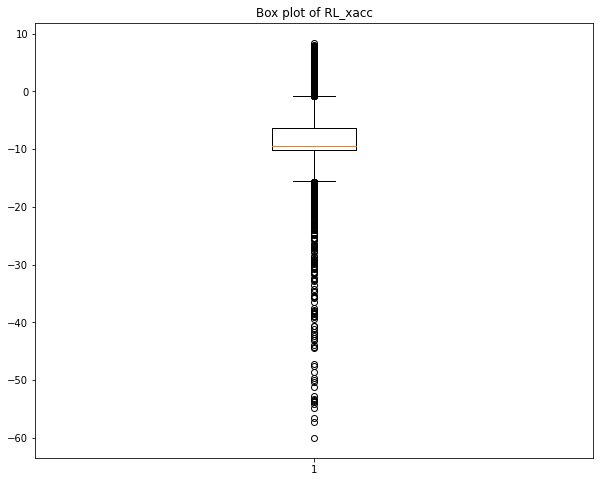

In [113]:
plt.figure(figsize=(10, 8))
plt.boxplot(data['RL_xacc'])
plt.title('Box plot of RL_xacc')

In [114]:
#Finding the percentiles and interquadrilerange (IQR)
Q1 = np.percentile(data['RL_xacc'],25,interpolation='midpoint')
Q2 = np.percentile(data['RL_xacc'],50,interpolation='midpoint')
Q3 = np.percentile(data['RL_xacc'],75,interpolation='midpoint')
print('Q1-',Q1)
print('Q2-',Q2)
print('Q3-',Q3)
#find the interquartile range IQR
IQR = Q3 - Q1
print('IQR-',IQR)
low_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
print('low_limit-',low_limit)
print('upper_limit-',upper_limit)
# Finding the outliners based on the upper an lower limit
out = pd.DataFrame()
out['outlier'] = data[(data['RL_xacc']<low_limit) | (data['RL_xacc']>upper_limit)]['RL_xacc']

out

Q1- -10.078
Q2- -9.5115
Q3- -6.3849
IQR- 3.6930999999999994
low_limit- -15.617649999999998
upper_limit- -0.845250000000001


,outlier
4646,-16.87100
4693,-21.98800
5018,-21.08300
5057,-21.58800
5162,-19.89100
...,...
21200,0.47983
21244,-16.63700
21246,-16.18200
21255,-23.20100


Text(0.5, 1.0, 'Box plot of RL_xacc')

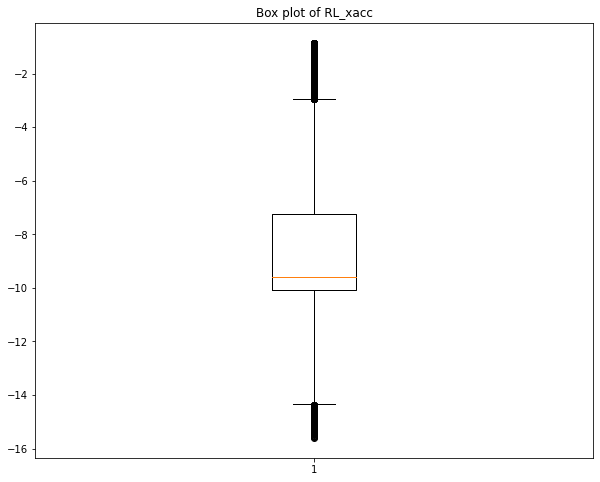

In [115]:
# Removing the ouliners
ind1= (data['RL_xacc']<low_limit) | (data['RL_xacc']>upper_limit)

data.drop(data.loc[ind1].index,inplace=True)
data.shape
plt.figure(figsize=(10, 8))
plt.boxplot(data['RL_xacc'])
plt.title('Box plot of RL_xacc')

#### column - T_yacc

Text(0.5, 1.0, 'Box plot of T_yacc')

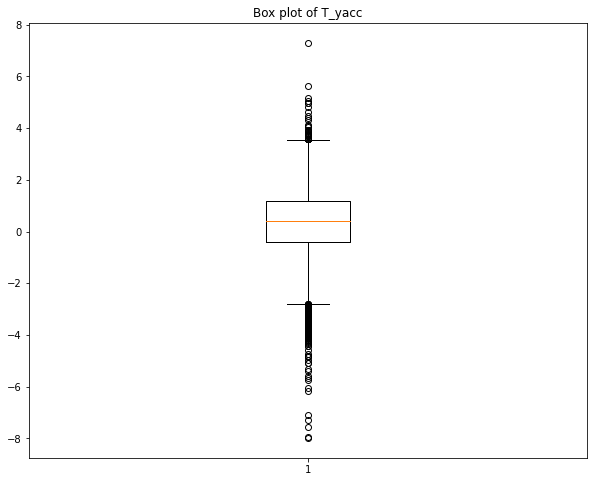

In [116]:
plt.figure(figsize=(10, 8))
plt.boxplot(data['T_yacc'])
plt.title('Box plot of T_yacc')

In [117]:
#Finding the percentiles and interquadrilerange (IQR)
Q1 = np.percentile(data['T_yacc'],25,interpolation='midpoint')
Q2 = np.percentile(data['T_yacc'],50,interpolation='midpoint')
Q3 = np.percentile(data['T_yacc'],75,interpolation='midpoint')
print('Q1-',Q1)
print('Q2-',Q2)
print('Q3-',Q3)
#find the interquartile range IQR
IQR = Q3 - Q1
print('IQR-',IQR)
low_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
print('low_limit-',low_limit)
print('upper_limit-',upper_limit)
# Finding the outliners based on the upper an lower limit
out = pd.DataFrame()
out['outlier'] = data[(data['T_yacc']<low_limit) | (data['T_yacc']>upper_limit)]['T_yacc']
# Removing the ouliners
ind1= (data['T_yacc']<low_limit) | (data['T_yacc']>upper_limit)

data.drop(data.loc[ind1].index,inplace=True)


Q1- -0.42154499999999995
Q2- 0.408325
Q3- 1.1679
IQR- 1.589445
low_limit- -2.8057125000000003
upper_limit- 3.5520675


Text(0.5, 1.0, 'Box plot of T_yacc')

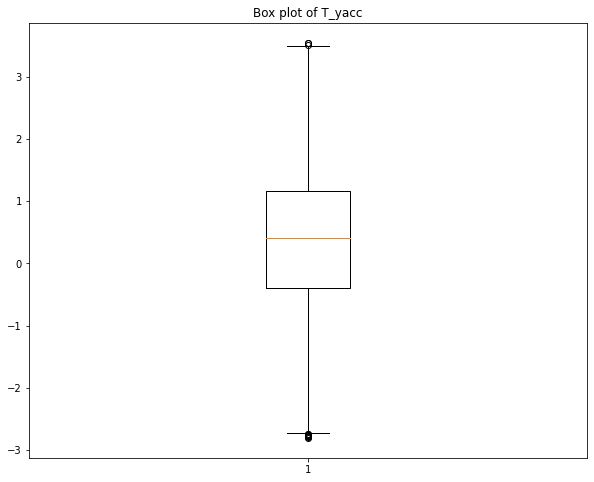

In [118]:
plt.figure(figsize=(10, 8))
plt.boxplot(data['T_yacc'])
plt.title('Box plot of T_yacc')

#### column - RA_xacc

Text(0.5, 1.0, 'Box plot of RA_xacc')

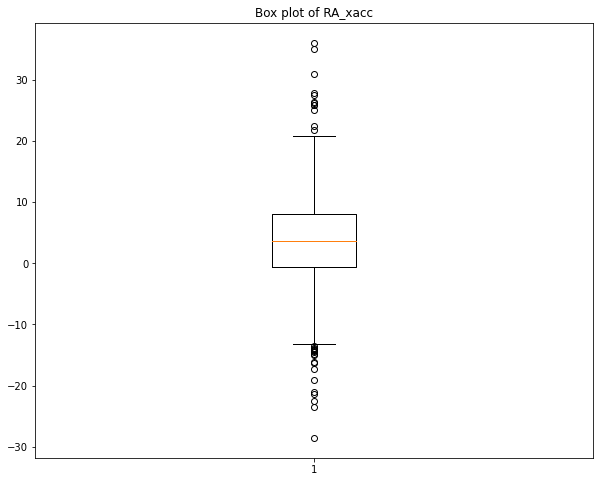

In [119]:
plt.figure(figsize=(10, 8))
plt.boxplot(data['RA_xacc'])
plt.title('Box plot of RA_xacc')

In [120]:
#Finding the percentiles and interquadrilerange (IQR)
Q1 = np.percentile(data['RA_xacc'],25,interpolation='midpoint')
Q2 = np.percentile(data['RA_xacc'],50,interpolation='midpoint')
Q3 = np.percentile(data['RA_xacc'],75,interpolation='midpoint')
print('Q1-',Q1)
print('Q2-',Q2)
print('Q3-',Q3)
#find the interquartile range IQR
IQR = Q3 - Q1
print('IQR-',IQR)
low_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
print('low_limit-',low_limit)
print('upper_limit-',upper_limit)
# Finding the outliners based on the upper an lower limit
out = pd.DataFrame()
out['outlier'] = data[(data['RA_xacc']<low_limit) | (data['RA_xacc']>upper_limit)]['RA_xacc']

# Removing the ouliners
ind1= (data['RA_xacc']<low_limit) | (data['RA_xacc']>upper_limit)

data.drop(data.loc[ind1].index,inplace=True)


Q1- -0.54234
Q2- 3.63715
Q3- 8.0947
IQR- 8.637039999999999
low_limit- -13.497899999999998
upper_limit- 21.050259999999998


Text(0.5, 1.0, 'Box plot of RA_xacc')

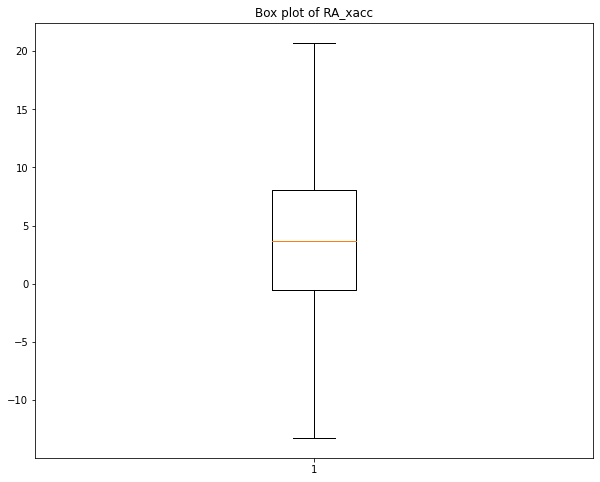

In [121]:
plt.figure(figsize=(10, 8))
plt.boxplot(data['RA_xacc'])
plt.title('Box plot of RA_xacc')

#### column - LL_yacc

Text(0.5, 1.0, 'Box plot of LL_yacc')

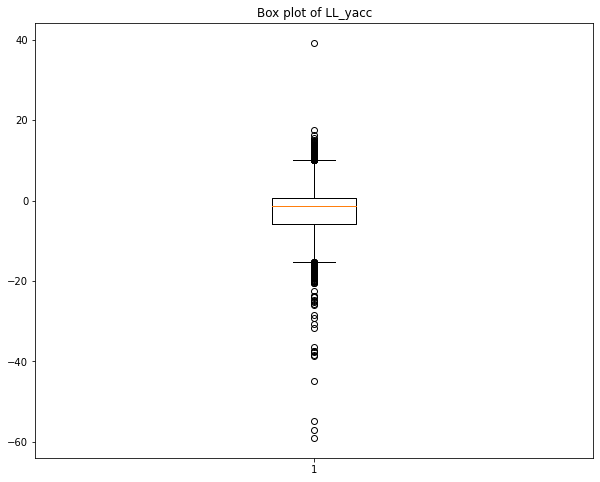

In [122]:
plt.figure(figsize=(10, 8))
plt.boxplot(data['LL_yacc'])
plt.title('Box plot of LL_yacc')

In [123]:
#Finding the percentiles and interquadrilerange (IQR)
Q1 = np.percentile(data['LL_yacc'],25,interpolation='midpoint')
Q2 = np.percentile(data['LL_yacc'],50,interpolation='midpoint')
Q3 = np.percentile(data['LL_yacc'],75,interpolation='midpoint')
print('Q1-',Q1)
print('Q2-',Q2)
print('Q3-',Q3)
#find the interquartile range IQR
IQR = Q3 - Q1
print('IQR-',IQR)
low_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
print('low_limit-',low_limit)
print('upper_limit-',upper_limit)
# Finding the outliners based on the upper an lower limit
out = pd.DataFrame()
out['outlier'] = data[(data['LL_yacc']<low_limit) | (data['LL_yacc']>upper_limit)]['LL_yacc']

# Removing the ouliners
ind1= (data['LL_yacc']<low_limit) | (data['LL_yacc']>upper_limit)

data.drop(data.loc[ind1].index,inplace=True)

Q1- -5.7238
Q2- -1.44815
Q3- 0.59145
IQR- 6.31525
low_limit- -15.196674999999999
upper_limit- 10.064325


Text(0.5, 1.0, 'Box plot of LL_yacc')

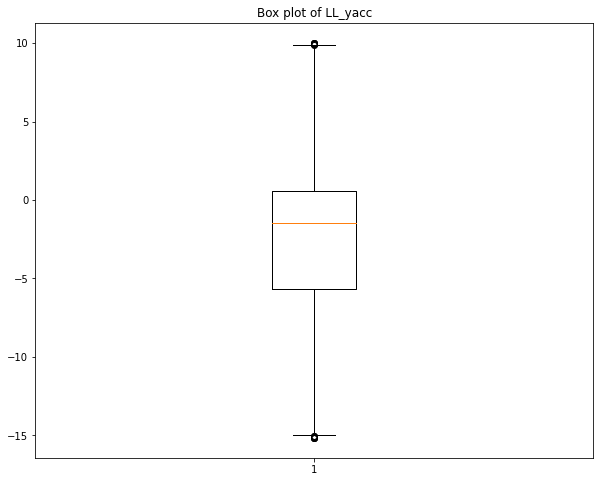

In [124]:
plt.figure(figsize=(10, 8))
plt.boxplot(data['LL_yacc'])
plt.title('Box plot of LL_yacc')

#### We have detected and handled outliers as part of preprocessing.

## Scaling

In [125]:
# splitting dataset into x and y

y = data["Activity"]
X = data.drop(['Activity'], axis=1)

In [126]:
X.describe()

,T_xacc,T_yacc,T_zacc,T_xgyro,T_ygyro,T_zgyro,T_xmag,T_ymag,T_zmag,RA_xacc,...,RL_xmag,RL_ymag,RL_zmag,LL_yacc,LL_zacc,LL_xgyro,LL_ygyro,LL_zgyro,LL_ymag,LL_zmag
count,14901.000000,14901.000000,14901.000000,14901.000000,14901.000000,14901.000000,14901.000000,14901.000000,14901.000000,14901.000000,...,14901.000000,14901.000000,14901.000000,14901.000000,14901.000000,14901.000000,14901.000000,14901.000000,14901.000000,14901.000000
mean,8.659881,0.371071,3.546653,-0.009058,0.026079,-0.004719,-0.630798,-0.068347,-0.391044,3.337170,...,0.479528,-0.310786,-0.073818,-2.661766,-0.091914,-0.010865,0.033381,0.011317,0.366049,0.041800
std,1.471733,1.126454,1.765733,0.554517,0.530300,0.229796,0.206326,0.286188,0.328842,4.938599,...,0.280719,0.342540,0.280701,4.292303,1.675976,0.723954,0.339230,1.202355,0.298272,0.310552
min,3.454500,-2.804700,-9.980400,-3.860700,-9.991900,-2.358600,-1.010900,-0.675680,-1.011200,-13.267000,...,-0.544220,-0.929850,-0.798980,-15.173000,-13.534000,-4.707300,-2.228400,-3.961700,-0.571560,-0.649780
25%,7.928700,-0.397730,2.540900,-0.173640,-0.129340,-0.097100,-0.791880,-0.234470,-0.685570,-0.533900,...,0.381150,-0.564410,-0.271620,-5.645300,-0.923490,-0.372810,-0.084757,-0.513450,0.193010,-0.108290
50%,8.555000,0.409860,3.547900,0.001957,0.020345,-0.003085,-0.681520,-0.089365,-0.475260,3.672200,...,0.501660,-0.315720,-0.040572,-1.461000,-0.467070,-0.005771,0.004306,-0.000869,0.364650,0.038360
75%,9.302300,1.167900,4.828900,0.177500,0.176400,0.091220,-0.547260,0.066050,-0.114500,8.109100,...,0.675680,-0.117400,0.144390,0.573460,0.789070,0.247690,0.156280,0.769800,0.594300,0.203570
max,12.925000,3.544700,15.841000,4.544600,6.793300,3.174900,0.734490,0.621650,0.778150,20.729000,...,1.139100,0.397580,0.575180,10.033000,12.592000,6.263800,3.318200,4.373100,0.984820,0.721510


In [127]:
# Min-Max scaling

from sklearn import preprocessing
minMaxScaler = preprocessing.MinMaxScaler(feature_range=(0,1))
X = minMaxScaler.fit_transform(X)
X = pd.DataFrame(X)

In [128]:
X.describe()

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
count,14901.000000,14901.000000,14901.000000,14901.000000,14901.000000,14901.000000,14901.000000,14901.000000,14901.000000,14901.000000,...,14901.000000,14901.000000,14901.000000,14901.000000,14901.00000,14901.000000,14901.000000,14901.000000,14901.000000,14901.000000
mean,0.549642,0.500169,0.523870,0.458240,0.596834,0.425387,0.217775,0.468141,0.346581,0.488415,...,0.608172,0.466363,0.527713,0.496359,0.51451,0.428073,0.407778,0.476678,0.602429,0.504328
std,0.155402,0.177411,0.068383,0.065972,0.031593,0.041528,0.118212,0.220598,0.183778,0.145270,...,0.166765,0.258047,0.204271,0.170289,0.06415,0.065987,0.061160,0.144257,0.191645,0.226467
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.472435,0.379086,0.484919,0.438659,0.587575,0.408693,0.125485,0.340091,0.181982,0.374547,...,0.549729,0.275299,0.383769,0.377993,0.48268,0.395083,0.386479,0.413717,0.491249,0.394876
50%,0.538567,0.506278,0.523918,0.459550,0.596492,0.425683,0.188714,0.451940,0.299517,0.498270,...,0.621320,0.462646,0.551907,0.543997,0.50015,0.428538,0.402536,0.475216,0.601530,0.501819
75%,0.617475,0.625665,0.573528,0.480435,0.605790,0.442725,0.265637,0.571736,0.501132,0.628783,...,0.724699,0.612047,0.686507,0.624711,0.54823,0.451640,0.429935,0.567680,0.749084,0.622297
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


#### We have performed min-max scaling as part of data preprocessing.

## Encoding

In [129]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()

data['Activity']= le.fit_transform(data['Activity']) 

In [130]:
print(data['Activity'].unique())

[11 12  0  1 13  7 16 15 14 10  5  4  2  3  9  6  8]


#### We have label encoded the 'Activity' column.

## Insights :

#### As part of data preprocessing, we have done the below :
#### 1) Feature reduction based on correlation
#### 2) Outlier detection and handling
#### 3) Standard scaling
#### 4) Encoding


## Expolatory Data Analyis

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16')])

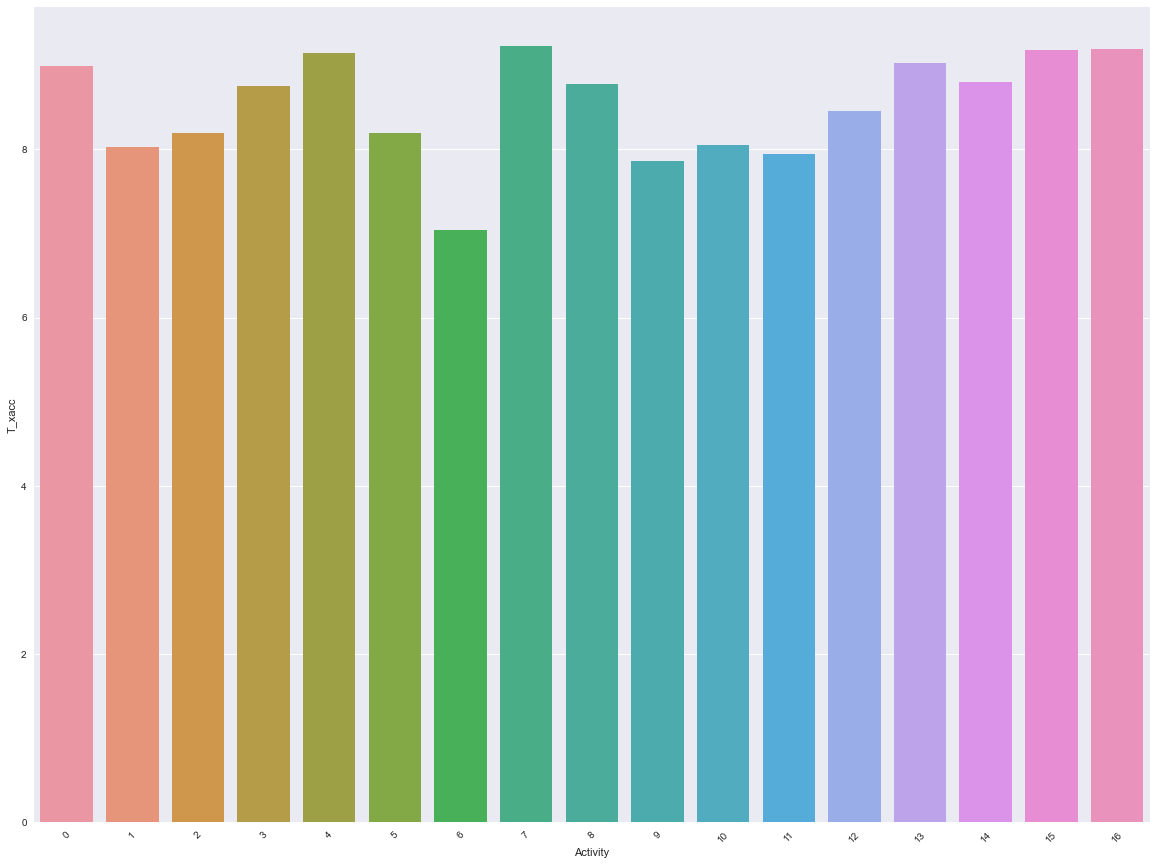

In [176]:
plt.figure(figsize=(20, 15))
df1 = data.groupby('Activity').mean()
df1
df1.reset_index(inplace=True)
sns.barplot(x='Activity', y='T_xacc', data=df1);
plt.xticks(rotation=45)

#### Here, we have plotted 'Activity' vs T_xacc and it can be concluded that the highest contribution to T_xacc is by Activity 7. Whereas the least is by Activity 6.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16')])

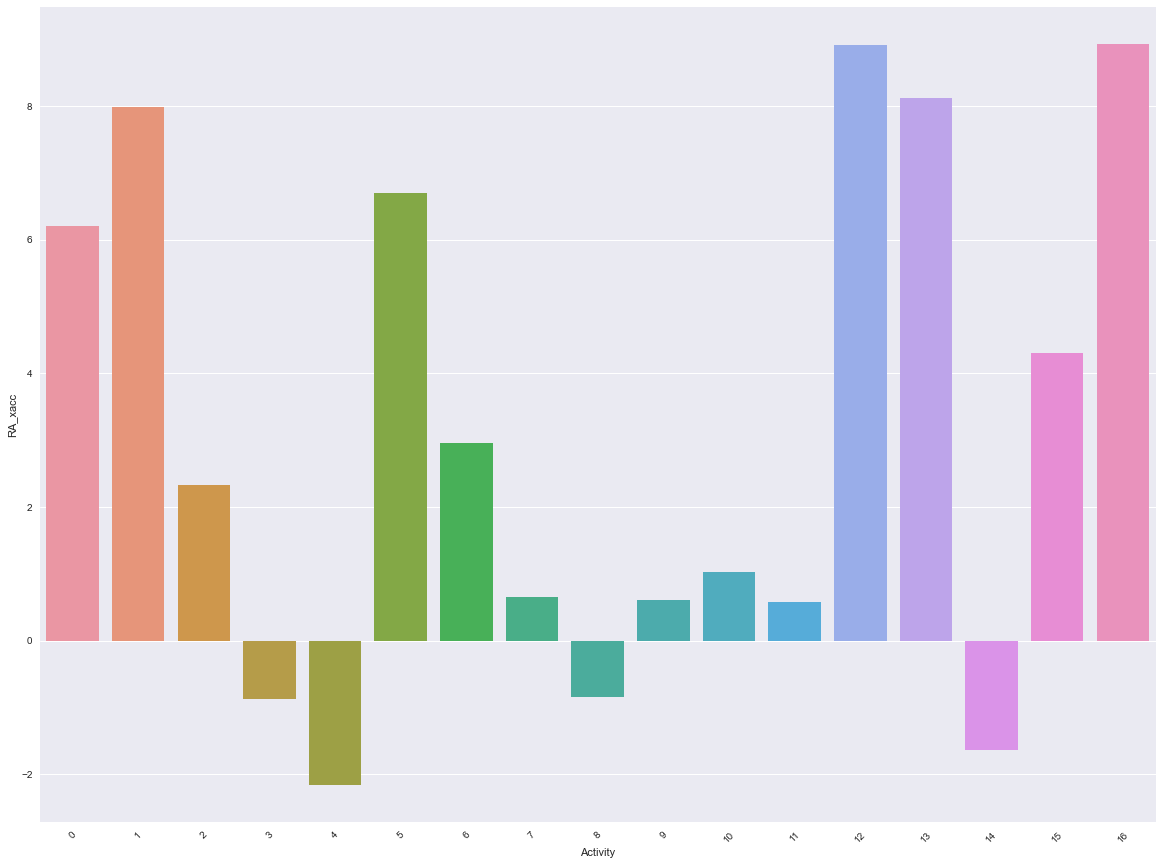

In [177]:
plt.figure(figsize=(20, 15))
df1 = data.groupby('Activity').mean()
df1
df1.reset_index(inplace=True)
sns.barplot(x='Activity', y='RA_xacc', data=df1);
plt.xticks(rotation=45)

#### Here, we have plotted 'Activity' vs RA_xacc and it can be concluded that the highest contribution to RA_xacc is by Activity 12. Whereas as the least is by Activity 4. 

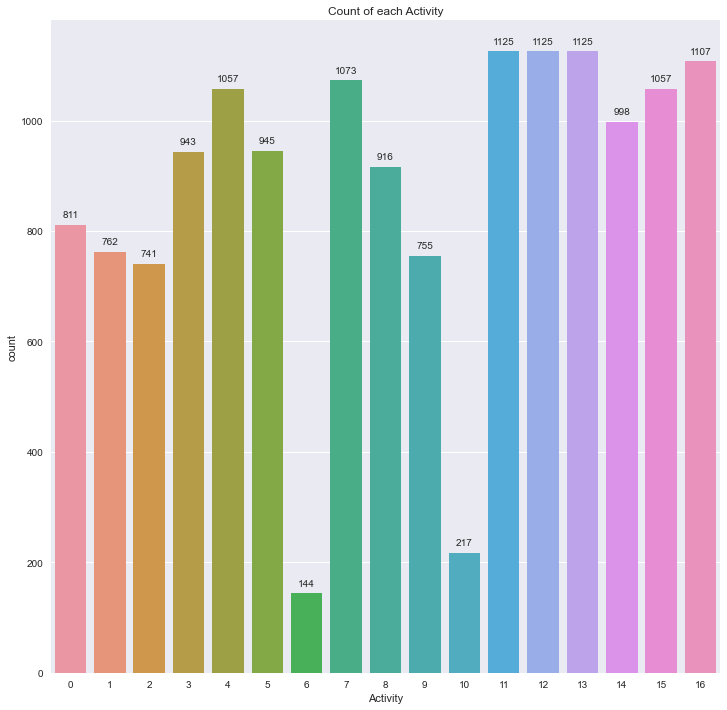

In [178]:
plt.figure(figsize=(12, 12))
ax = sns.countplot(x="Activity",data=data)
plt.title("Count of each Activity");
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

#### Here, we have plotted the count of each 'Activity' and it can be concluded that the highest count of 1125 is for 3 activities - 11,12 and 13. The least count is for Activity 6 which is equal to 144.

array([[<AxesSubplot:title={'center':'T_xacc'}>,
        <AxesSubplot:title={'center':'T_yacc'}>,
        <AxesSubplot:title={'center':'T_zacc'}>,
        <AxesSubplot:title={'center':'T_xgyro'}>,
        <AxesSubplot:title={'center':'T_ygyro'}>,
        <AxesSubplot:title={'center':'T_zgyro'}>,
        <AxesSubplot:title={'center':'T_xmag'}>],
       [<AxesSubplot:title={'center':'T_ymag'}>,
        <AxesSubplot:title={'center':'T_zmag'}>,
        <AxesSubplot:title={'center':'RA_xacc'}>,
        <AxesSubplot:title={'center':'RA_yacc'}>,
        <AxesSubplot:title={'center':'RA_zacc'}>,
        <AxesSubplot:title={'center':'RA_xgyro'}>,
        <AxesSubplot:title={'center':'RA_ygyro'}>],
       [<AxesSubplot:title={'center':'RA_zgyro'}>,
        <AxesSubplot:title={'center':'RA_xmag'}>,
        <AxesSubplot:title={'center':'RA_ymag'}>,
        <AxesSubplot:title={'center':'RA_zmag'}>,
        <AxesSubplot:title={'center':'LA_xacc'}>,
        <AxesSubplot:title={'center':'LA_yacc'}>,
 

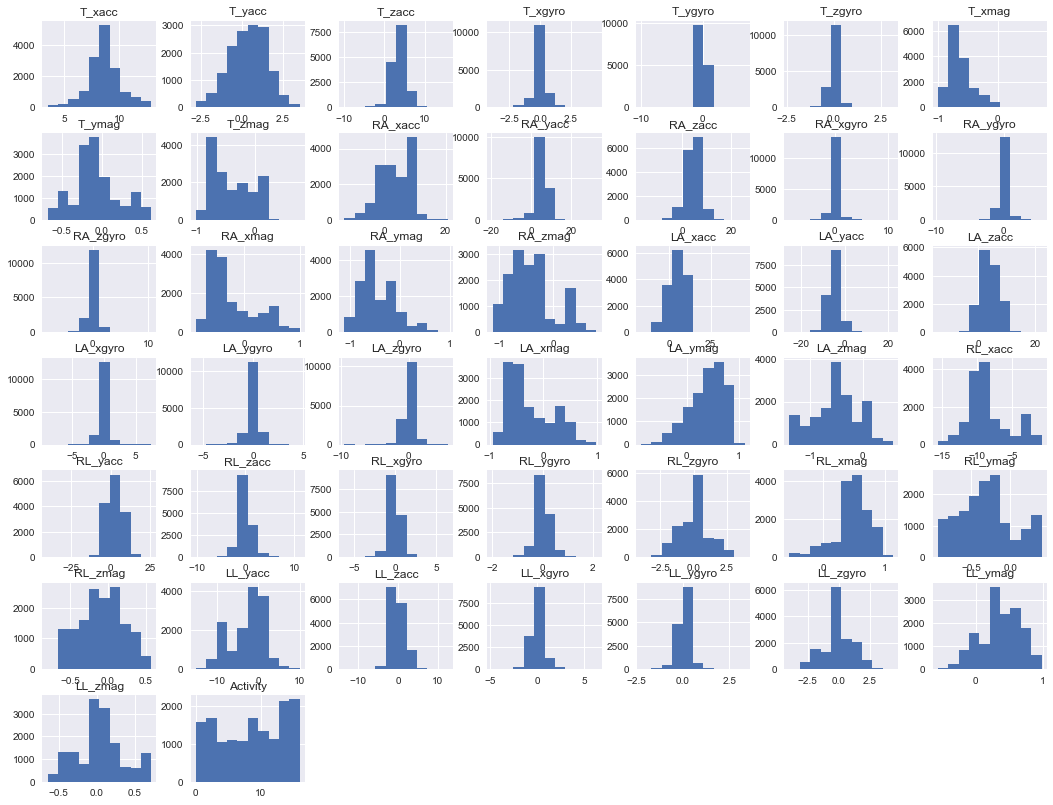

In [179]:
data.hist(figsize=(18, 14))

#### Here, we have plotted the histograms. 
#### The below shows normal distribution :
#### T_xacc
#### T_yacc

#### The below are right-skewed :
#### T_xmag
#### LA_xmag

#### The below are left skewed :
#### RL_xmag
#### LL_ymag

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44]),
 [Text(1, 0, 'T_xacc'),
  Text(2, 0, 'T_yacc'),
  Text(3, 0, 'T_zacc'),
  Text(4, 0, 'T_xgyro'),
  Text(5, 0, 'T_ygyro'),
  Text(6, 0, 'T_zgyro'),
  Text(7, 0, 'T_xmag'),
  Text(8, 0, 'T_ymag'),
  Text(9, 0, 'T_zmag'),
  Text(10, 0, 'RA_xacc'),
  Text(11, 0, 'RA_yacc'),
  Text(12, 0, 'RA_zacc'),
  Text(13, 0, 'RA_xgyro'),
  Text(14, 0, 'RA_ygyro'),
  Text(15, 0, 'RA_zgyro'),
  Text(16, 0, 'RA_xmag'),
  Text(17, 0, 'RA_ymag'),
  Text(18, 0, 'RA_zmag'),
  Text(19, 0, 'LA_xacc'),
  Text(20, 0, 'LA_yacc'),
  Text(21, 0, 'LA_zacc'),
  Text(22, 0, 'LA_xgyro'),
  Text(23, 0, 'LA_ygyro'),
  Text(24, 0, 'LA_zgyro'),
  Text(25, 0, 'LA_xmag'),
  Text(26, 0, 'LA_ymag'),
  Text(27, 0, 'LA_zmag'),
  Text(28, 0, 'RL_xacc'),
  Text(29, 0, 'RL_yacc'),
  Text(30, 0, 'RL_zacc'),
  Text(31, 0, 'RL_xgyro'),


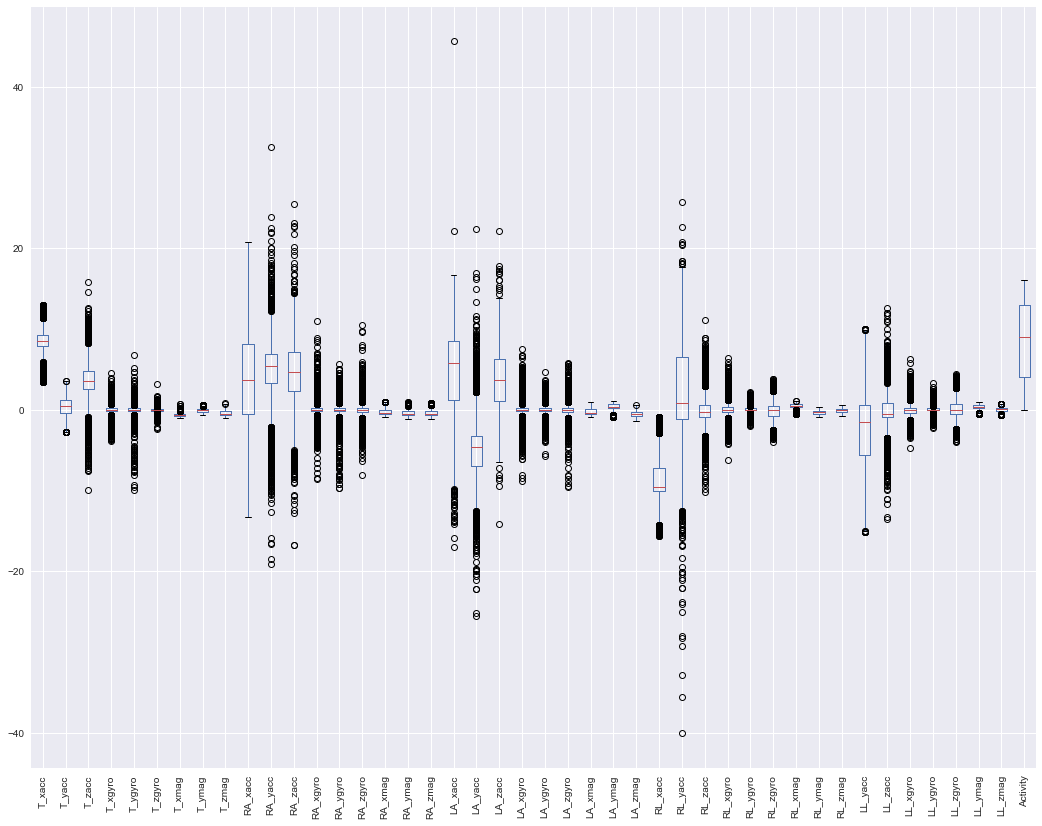

In [180]:
plt.figure(figsize=(18, 14))
data.boxplot()
plt.xticks(rotation=90) 

#### Here, we have plotted the boxplots. From this, we will get a clear idea bout which all features have and outliers and this will help us in detecting and handling outliers.

# Modeling

In [133]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

## i) Random Forest Classifier

In [134]:
from sklearn.metrics import accuracy_score

In [135]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [136]:
print('Accuracy on Random Forest model is : ', accuracy_score(y_test, y_pred))

Accuracy on Random Forest model is :  1.0


## ii) LogisticRegression

In [137]:
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression()
logit_model.fit(X_train, y_train)
y_pred = logit_model.predict(X_test)

C:\Users\deepthi777\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [138]:
print('Accuracy on LR model is : ', accuracy_score(y_test, y_pred))

Accuracy on LR model is :  0.9919490103991949


## iii) KNN

In [144]:
from sklearn.neighbors import KNeighborsClassifier
acc_values = []
neighbors = np.arange(3, 15)
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k, metric='minkowski')
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    acc_values.append(acc)

In [145]:
acc_values

[0.9983227104998322,
 0.9976517946997652,
 0.9973163367997316,
 0.9969808788996981,
 0.9969808788996981,
 0.996309963099631,
 0.9966454209996646,
 0.9956390472995639,
 0.9966454209996646,
 0.9959745051995974,
 0.9956390472995639,
 0.9949681314994968]

Text(0, 0.5, 'accuracy')

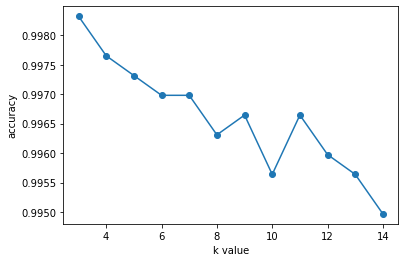

In [146]:
plt.plot(neighbors, acc_values, 'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')

#### From the graph, it is clear that the highest accuracy corresponds to k value = 3.

In [148]:
# checking the model

classifier = KNeighborsClassifier(n_neighbors=3, metric='minkowski')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [150]:
print('Accuracy on kNN model is : ', accuracy_score(y_test, y_pred))

Accuracy on kNN model is :  0.9983227104998322


## iv) SVM

In [151]:
from sklearn.svm import SVC

In [153]:
# linear SVM

clf = SVC(kernel='linear') 
model = clf.fit(X_train,y_train)
predictions = model.predict(X_test)

In [154]:
print('Accuracy on linear SVM model is : ', accuracy_score(y_test, y_pred))

Accuracy on linear SVM model is :  0.9983227104998322


In [155]:
# radial SVM

clf = SVC(kernel='rbf') 
model = clf.fit(X_train,y_train)
predictions = model.predict(X_test)

In [156]:
print('Accuracy on radial SVM model is : ', accuracy_score(y_test, y_pred))

Accuracy on radial SVM model is :  0.9983227104998322


## v) Decision Tree

In [157]:
from sklearn.tree import DecisionTreeClassifier

In [158]:
dclf = DecisionTreeClassifier()
model = dclf.fit(X_train,y_train)
predictions = model.predict(X_test)

In [159]:
print('Accuracy on decision tree model is : ', accuracy_score(y_test, y_pred))

Accuracy on decision tree model is :  0.9983227104998322


#### Insights :

#### As part of choosing the best fit model, we haev tried the following models.
#### 1) Random Forest Classifier
#### 2) LogisticRegression
#### 3) kNN
#### 4) SVM
#### 5) Decision Tree

#### Even though all the models are giving high accuracy, the highest accuracy 0f 100% is given by Random Forest Classifier. Hence we chose that as the best fit model for the given dataset.

## Hyperparameter tuning for Logistic Regression and kNN

In [164]:
from sklearn.model_selection import GridSearchCV

In [170]:
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,5))
n_neighbors = list(range(3,10))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()

In [171]:
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=5)
#Fit the model
best_model = clf.fit(X_train,y_train)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 1
Best p: 1
Best n_neighbors: 3


In [172]:
kncdf = KNeighborsClassifier(leaf_size=1,n_neighbors=3,metric="minkowski",p=2)
model = kncdf.fit(X_train,y_train)
predictions = model.predict(X_test)

In [173]:
print('Accuracy on kNN model after hyperparameter tuning is : ', accuracy_score(y_test, y_pred))

Accuracy on kNN model after hyperparameter tuning is :  0.9983227104998322


#### As part of hyperparameter tuning, we have included GridSearchCV for kNN and have tuned it to be of more accuracy and the best parameters and accuracy value are as follows :

#### Best leaf_size: 1
#### Best p: 1
#### Best n_neighbors: 3
#### Accuracy on kNN model after hyperparameter tuning is :  0.9983227104998322